In [1]:
import sys
import numpy as np
import cv2
import os
import re
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

### Configurar path

In [3]:
path=os.getcwd()+"/../FUENTES/day_very_close_view_adrian/"

In [4]:
path

'/home/jorge/Documentos/Datos_complejos/Proyecto_final/scraps/mega3/PROYECTO_IMAGENES/CODIGO/../FUENTES/day_very_close_view_adrian/'

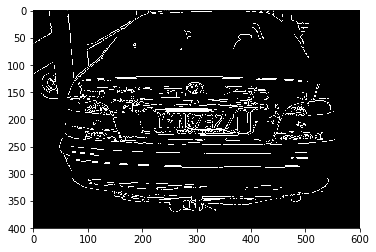

In [5]:
img = cv2.imread(path+"67.JPG")            # read in training numbers image
imgTrainingNumbers = cv2.resize(img,(600,400))
imgGray = cv2.cvtColor(imgTrainingNumbers, cv2.COLOR_BGR2GRAY)          # get grayscale image
edges = cv2.Canny(imgGray,80,250)

plt.imshow(edges, cmap = 'gray')

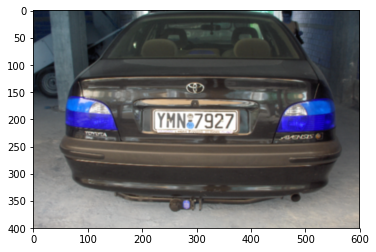

In [6]:
#Conseguimos los contornos de los caracteres y numeros de las placas considerando criterios de tamanos en la imagen 
im2, contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
h_list=[]
for contour in contours:
  [x,y,w,h]=cv2.boundingRect(contour)
  if 2*h > w:
    continue
            
  if w < 30 or h < 30:
    continue
  
  if h>300 or w>300:
    continue 
  #rect=cv2.rectangle(imgTrainingNumbers, (x, y), (x + w, y + h), (0, 255,255), 1)          
  h_list.append([x,y,w,h])
plt.imshow(imgTrainingNumbers, interpolation="bicubic")

YMNE 927


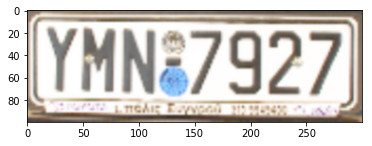

In [7]:
#Ordenamos los rectangulos de izquierda a derecha
x_s=[]
for i in range(0, len(h_list)):
  x_s.append(h_list[i][0])

dic=dict(zip(x_s,h_list))

#Reconocemos cada caracter dentro de los contornos obtenidos
i=0
for key in sorted(dic):
  [x,y,w,h]=dic[key]
  #rect=cv2.rectangle(imgTrainingNumbers, (x, y), (x + w, y + h), (255, 255,255), 1)
  text=""
  if y-4>0 and x-4>0 and y + h+4<100 and x + w+4<300:
    cropped = imgTrainingNumbers[y-4 :y +  h+4 , x-4 : x + w+4]
  else:
    cropped = imgTrainingNumbers[y-1 :y +  h+1 , x-1 : x + w+1]
  imgCropped = cv2.resize(cropped,(300,100))  
  bordersize=10
  border=cv2.copyMakeBorder(imgCropped, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
  text=pytesseract.image_to_string(border)
  text=re.sub(r'[^\w]', ' ', text)
  if len(text)>5:  
      print(text)  
      plt.figure()
      plt.imshow(imgCropped, interpolation="bicubic")
      #cv2.imwrite(str(i)+'messigray.png',imgCropped)
      i=i+1
  


In [101]:
def ocr_plate(filename,tipo_prep,tipo_ocr):
    placa_text=''
    #funcion que retorna el string de la placa de un carro obteniendo el mas probable
    #Entrada filename = ruta de archivo de imagen tipo (0-Canny,1 thressh-1, 2 / thresh-2)
    if(tipo_prep==0):
        img = cv2.imread(filename)            # read in training numbers image
        imgTrainingNumbers = cv2.resize(img,(600,400))
        imgGray = cv2.cvtColor(imgTrainingNumbers, cv2.COLOR_BGR2GRAY)          # get grayscale image
        edges = cv2.Canny(imgGray,80,250)
        plt.imshow(edges, cmap = 'gray')
    
    #Conseguimos los contornos de los caracteres y numeros de las placas considerando criterios de tamanos en la imagen 
    im2, contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    h_list=[]
    for contour in contours:
      [x,y,w,h]=cv2.boundingRect(contour)
      if 2*h > w:
        continue

      if w < 30 or h < 30:
        continue

      if h>300 or w>300:
        continue 
      #rect=cv2.rectangle(imgTrainingNumbers, (x, y), (x + w, y + h), (0, 255,255), 1)          
      h_list.append([x,y,w,h])
    plt.imshow(imgTrainingNumbers, interpolation="bicubic")
    
    #Ordenamos los rectangulos de izquierda a derecha
    x_s=[]
    for i in range(0, len(h_list)):
      x_s.append(h_list[i][0])

    dic=dict(zip(x_s,h_list))

    #Reconocemos cada caracter dentro de los contornos obtenidos
    i=0
    for key in sorted(dic):
      [x,y,w,h]=dic[key]
#       cropped = imgTrainingNumbers[y:y+h , x:x+w]
      #rect=cv2.rectangle(imgTrainingNumbers, (x, y), (x + w, y + h), (255, 255,255), 1)
      text=""
      if y-4>0 and x-4>0 and y + h+4<100 and x + w+4<300:
        cropped = imgTrainingNumbers[y-4 :y +  h+4 , x-4 : x + w+4]
      else:
        cropped = imgTrainingNumbers[y-1 :y +  h+1 , x-1 : x + w+1]
      imgCropped = cv2.resize(cropped,(300,100))  
      bordersize=10
      border=cv2.copyMakeBorder(imgCropped, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
      text=pytesseract.image_to_string(border)
      file_name_pĺaca=os.path.split(filename)[0]+"/../canny/"+os.path.split(filename)[1]+"_placa"+str(i)+".jpg"
      #cv2.imwrite(file_name_pĺaca,img[y:(y+h),x:(x+w),:])
      cv2.imwrite(file_name_pĺaca,imgCropped)
      
      if len(text)>4 and len(text)<10:
        placa_text=text
    
      text=re.sub(r'[^\w]', ' ', text)
      if len(text)>5:  
          print(text)  
          plt.figure()
          plt.imshow(imgCropped, interpolation="bicubic")
          #cv2.imwrite(str(i)+'messigray.png',imgCropped
          i=i+1


    return placa_text

In [164]:
def ocr_plate_threshold(file_name,opciont=1):
    placa_text=''
    img = cv2.imread(file_name)
    img = cv2.resize(img,(600,400))

    img_final = cv2.imread(file_name)
    img_final = cv2.resize(img_final,(600,400))
    
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img2gray,interpolation="bicubic")
    if opciont==1:
        ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)
    if opciont==2:
        ret, mask = cv2.threshold(img2gray, 140, 255, cv2.THRESH_BINARY)
    
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    
    _, contours, hierarchy = cv2.findContours(image_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    i=0;    
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 90 and h < 50:
            continue
        if w > 300 or h > 100:
            continue
        if not ((w>2*h) and (w<5*h)):
            continue
        
        #plt.imshow(img[y:(y+h),x:(x+w),:],interpolation="bicubic")
        if opciont==1:
            file_name_pĺaca = os.path.split(file_name)[0]+"/../op1/"+os.path.split(file_name)[1]+"_placa"+str(i)+".jpg"
        if opciont==2:
            file_name_pĺaca = os.path.split(file_name)[0]+"/../op2/"+os.path.split(file_name)[1]+"_placa"+str(i)+".jpg"
        cv2.imwrite(file_name_pĺaca,img[y:(y+h),x:(x+w),:])
        
        plt.imshow(img2gray,interpolation="bicubic")
        
        if y-4>0 and x-4>0 and y + h+4<100 and x + w+4<300:
            cropped = img[y-4 :y +  h+4 , x-4 : x + w+4]
        else:
            cropped = img[y-1 :y +  h+1 , x-1 : x + w+1]
        imgCropped = cv2.resize(cropped,(300,100))  
        
#         imgCropped = image_final[y:(y+h),x:(x+w)]
#         imgCropped = cv2.resize(imgCropped,(300,100))  
        bordersize=10
        
        border=cv2.copyMakeBorder(imgCropped, top=bordersize, bottom=bordersize, left=bordersize, right=bordersize, borderType= cv2.BORDER_CONSTANT, value=[255,255,255] )
        #plt.imshow(border,interpolation="bicubic")
        #border = cv2.Canny(border,80,250)## Borrar prueba
        #ret, mask = cv2.threshold(border, 60, 255, cv2.THRESH_BINARY)
        plt.imshow(mask,interpolation="bicubic")

        text=pytesseract.image_to_string(border)
        
        if len(text)>4 and len(text)<10:
            placa_text=text
        print(np.shape(img))
        
        ## descomentar si se quiere ver intercativamente la region econtrada
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0,0), 4)
        i=i+1
    # write original image with added contours to disk
    #plt.imshow(img,interpolation="bicubic")
    #plt.imshow(img[x:(x+w),y:(y+h)],interpolation="bicubic")
    return placa_text




In [145]:
path=os.getcwd()+"/../FUENTES/day_very_close_view_adrian/"

In [146]:
file_name_1 = path+"67.JPG"
file_name_2 = path+"HPIM0627.JPG"
file_name_3 = path+"HPIM0979.JPG"
list_files = [file_name_1,file_name_2]

YMNE 927


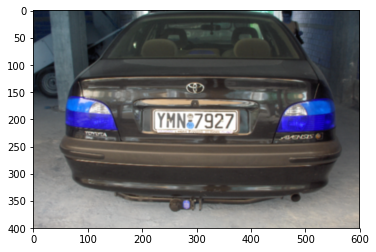

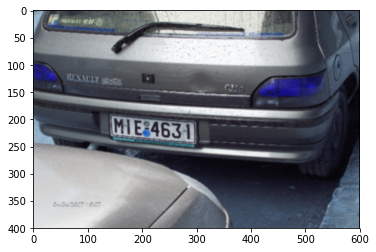

In [147]:
for k in list_files:
    ocr_plate(k,tipo_prep=0,tipo_ocr=0)

In [148]:
os.path.split(file_name_1)[0]+"/../canny/"+os.path.split(file_name_1)[1]+"_placa"+str(i)+".jpg"

'/home/jorge/Documentos/Datos_complejos/Proyecto_final/scraps/mega3/PROYECTO_IMAGENES/CODIGO/../FUENTES/day_very_close_view_adrian/../canny/67.JPG_placa1.jpg'

YMNE 927


'YMNE/927'

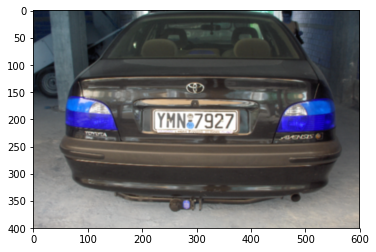

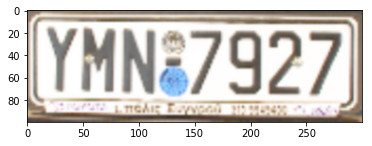

In [149]:
ocr_plate(file_name_1,tipo_prep=0,tipo_ocr=0)

(400, 600, 3)


''

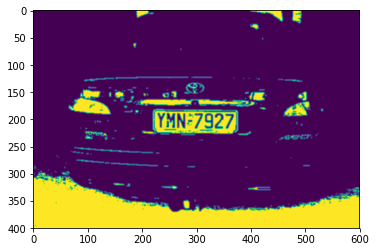

In [165]:
ocr_plate_threshold(file_name_1,opciont=2)

(400, 600, 3)
(400, 600, 3)


'(APES8549'

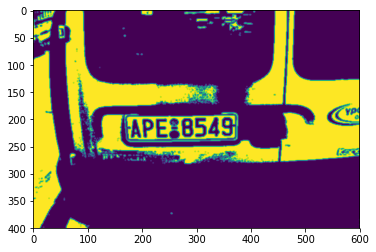

In [166]:
file_name_4 = path+"33.JPG"
ocr_plate_threshold(file_name_4,opciont=2)

''

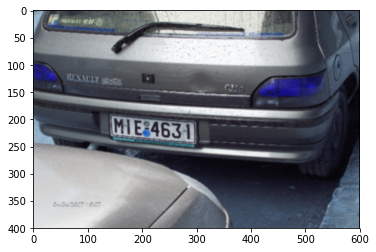

In [115]:
ocr_plate(file_name_2,tipo_prep=0,tipo_ocr=0)

''

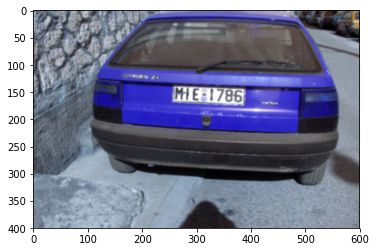

In [116]:
ocr_plate(file_name_3,tipo_prep=0,tipo_ocr=0)

 APE28549 


''

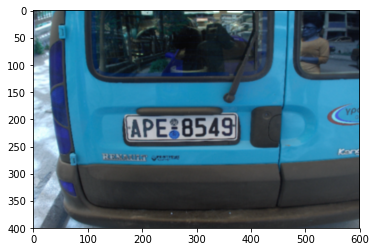

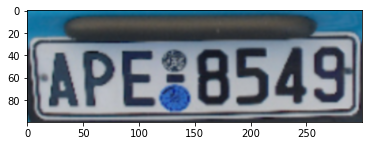

In [143]:
file_name_4 = path+"33.JPG"
ocr_plate(file_name_4,tipo_prep=0,tipo_ocr=0)

LLEASBUS 4 
YEA 8054
YEA 8054
 APE28549 
M1K24477
 MIZ 7793 
YHT 5335
f 1BM 9560
YZ731683 
   22226
EME ELe
f mine i
MIESB8 tA
a MIN 4705
MIN 4705
cde  ele try
TMAS1784
IAN  SC 
YMNE 927
  KY Az9649


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


YHNE7927 


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MIKE6 37


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


M1B37969


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


fortwo


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ee a ath  


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


v   AIK  8975   
HMI K 8979 


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


WHI  5855 


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


A AMPTEE Ww amntTa 


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MIZ31475 


/home/jorge/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


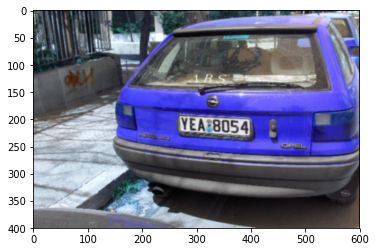

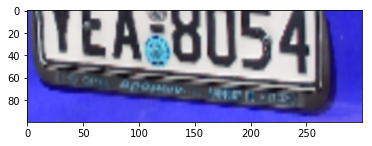

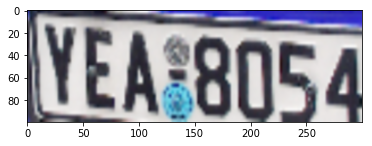

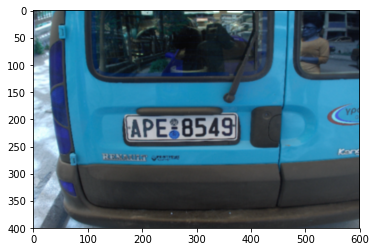

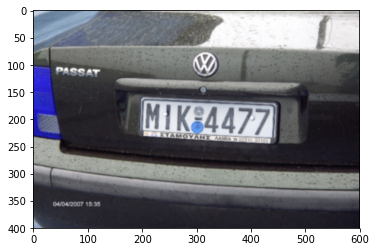

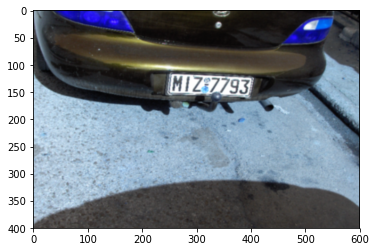

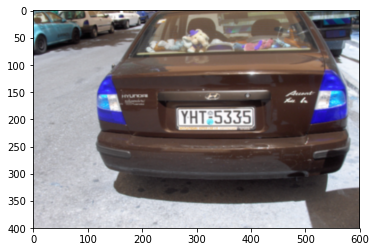

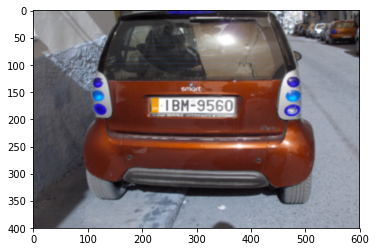

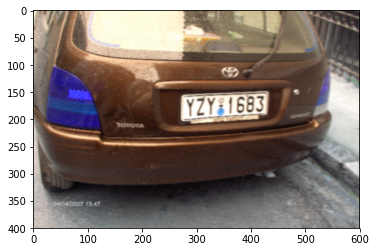

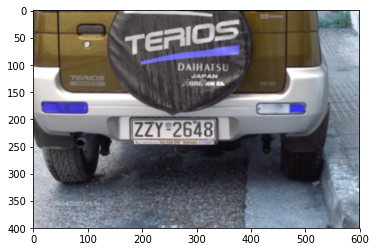

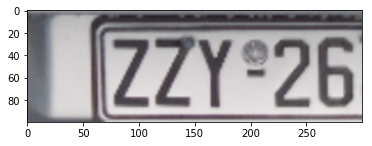

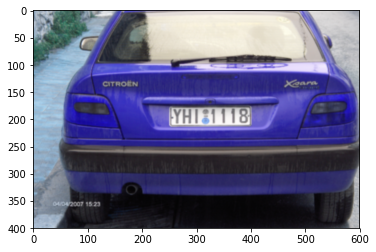

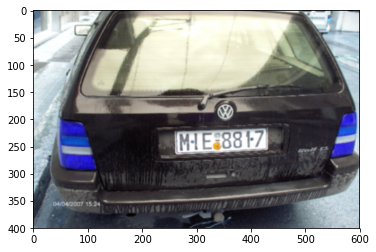

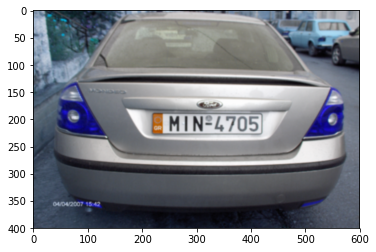

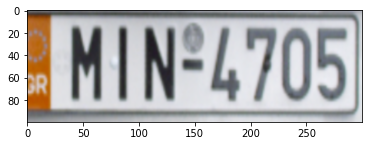

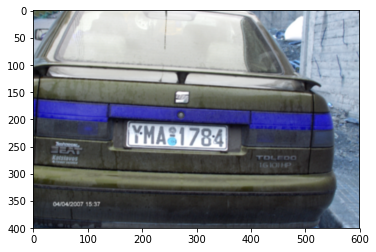

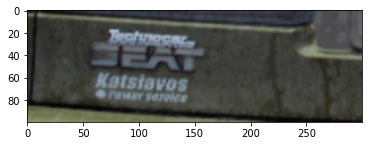

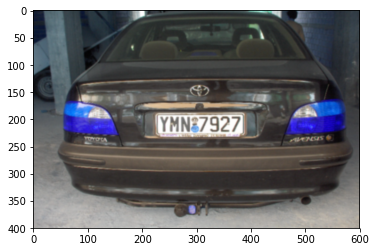

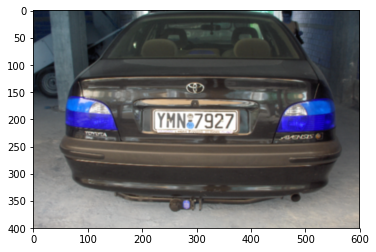

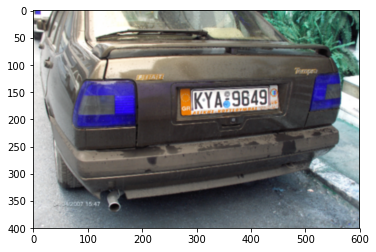

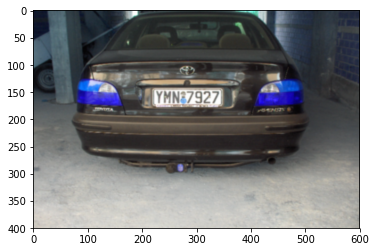

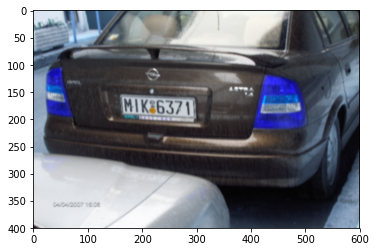

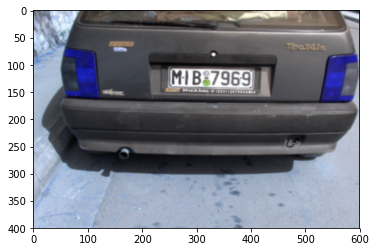

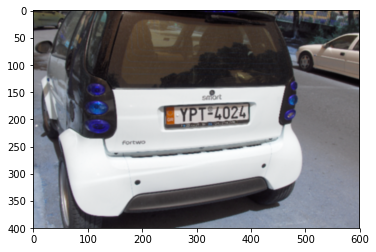

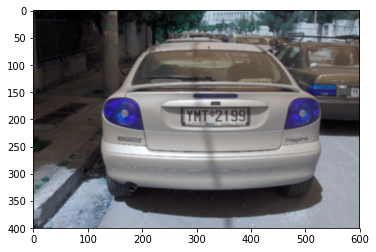

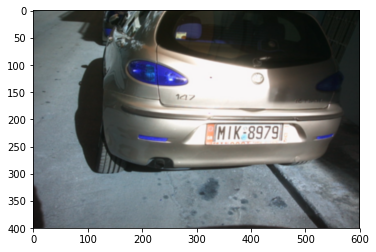

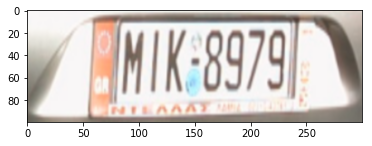

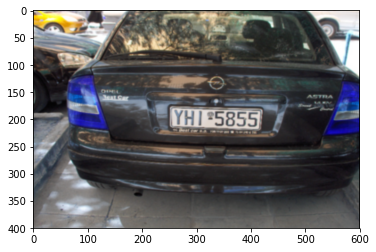

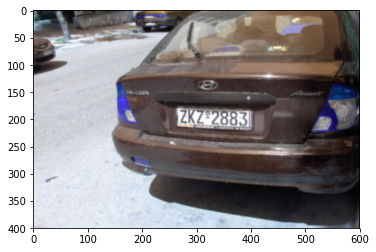

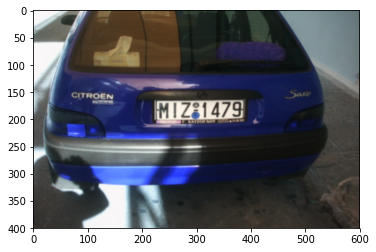

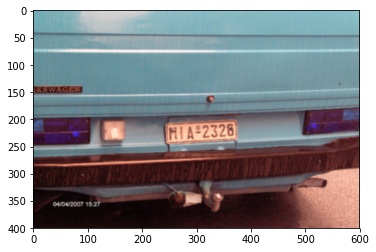

In [141]:
lista_placas_name =[]

for file_name in os.listdir(path):
    lista_placas_name.append(ocr_plate(path+file_name,tipo_prep=0,tipo_ocr=0))

In [142]:
lista_placas_name

['',
 '',
 '',
 '',
 '',
 '',
 'YEA?8054',
 '',
 '',
 '',
 '',
 '',
 'M1K24477',
 '',
 '',
 '',
 'YHT:5335',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'YZ731683]',
 'EME ELe',
 '',
 '',
 '',
 '',
 '',
 'riey)',
 '',
 '',
 '',
 '',
 'MIESB8 tA',
 '',
 '',
 'MIN=4705',
 '',
 'TMAS1784',
 '',
 '',
 '',
 'IAN&/SC/',
 '',
 'YMNE/927',
 '',
 '',
 '',
 '',
 '',
 'YHNE7927]',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'MIKE6 37',
 '',
 '',
 '',
 '',
 '',
 'M1B37969',
 '',
 'fortwo',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '(g585',
 '',
 'MIZ31475]',
 '',
 '']

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 

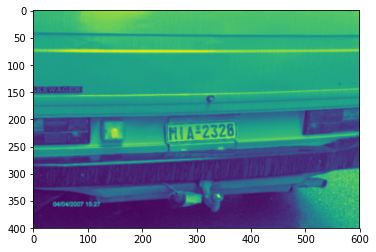

In [139]:
lista_placas_name_2 =[]

for file_name in os.listdir(path):
    lista_placas_name_2.append(ocr_plate_threshold(path+file_name,opciont=2))


In [119]:
lista_placas_name

['',
 '',
 '',
 '',
 '',
 '',
 'YEA?8054',
 '',
 '',
 '',
 '',
 '(APES8949',
 '',
 '',
 '',
 '',
 'YHT=5355',
 '',
 '',
 '',
 '',
 'A\n\n7]',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'YHTST TTS',
 'LY\n\nWW',
 '',
 '',
 '',
 'MIES8ot/',
 '',
 'en CUNT',
 'MIN=4705',
 '',
 'TMAS1784',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'TMAS1784',
 '',
 'YHNE7927|',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'NEZé5775)',
 '',
 '',
 '',
 'YIM37174)',
 '',
 '',
 '',
 '',
 '',
 '',
 'MIKs4030',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'uy\na |',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'MIES4631',
 '',
 '',
 '',
 '',
 '| a oe',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '[AEC roe',
 '',
 '']

In [140]:
lista_placas_name_2

['',
 '',
 '',
 '',
 '7H? GBA',
 '',
 'YEA?8054',
 '',
 '',
 '',
 '',
 '(APES8549',
 '',
 '',
 '',
 '',
 'YHT?5335',
 '',
 '',
 '',
 '',
 'A\n\n/7',
 '',
 '',
 'YZ731683)',
 '',
 '',
 '',
 '',
 '',
 '',
 'WHT st',
 '',
 '',
 '',
 '',
 'MIEs88t7',
 'LY HB°53.',
 '',
 '',
 '',
 'TMA31784',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'TMAS1 784',
 '',
 'YHNE7927',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'MTKs4030)',
 'a PMP',
 '',
 '',
 '',
 '',
 '',
 "MIN'6996",
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '> hk\n\noor',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']